# IMPORTAÇÃO DE BIBLIOTECAS

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import pingouin as pg
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as me
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
from sklearn.linear_model import LinearRegression, LogisticRegression
from collections import Counter
import copy
from sklearn.model_selection import KFold

In [34]:
# COMMON VARIABLES

alg_to_analyze = [
    'vader_sentiment_analysis_score',
    'vader_sentiment_analysis_polarity'
]

tpd_columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

# LEITURA DE ARQUIVOS

In [35]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [36]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [37]:
data_psi = pd.read_csv(r'/Users/leosilva/Documents/Estudo/Doutorado/Coimbra/2019-2020/Disciplinas/Thesis/analises_psicologos/tweets_consolidados.csv')
data_psi.columns = ['id',
                    'Classificacao_PSI1_5_cat',
                    'Classificacao_PSI2_5_cat',
                    'Classificacao_PSI3_5_cat']
data_psi.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat
0,102600,Negativo Fraco,Positivo Fraco,Neutro
1,102895,Negativo Fraco,Negativo Forte,Negativo Forte
2,103085,Negativo Forte,Negativo Forte,Negativo Forte
3,103092,Positivo Fraco,Positivo Fraco,Positivo Fraco
4,103200,Positivo Fraco,Negativo Fraco,Negativo Forte


In [38]:
data_psi_restantes = pd.read_csv(r'/Users/leosilva/Documents/Estudo/Doutorado/Coimbra/2019-2020/Disciplinas/Thesis/analises_psicologos/tweets_restantes_consolidados.csv')
data_psi_restantes.columns = ['id',
                    'Classificacao_PSI1_5_cat',
                    'Classificacao_PSI2_5_cat',
                    'Classificacao_PSI3_5_cat']
data_psi_restantes.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat
0,140009,Negativo Fraco,Negativo Fraco,Positivo Fraco
1,140363,Neutro,Neutro,Neutro
2,140622,Positivo Fraco,Positivo Fraco,Positivo Fraco
3,140710,Neutro,Neutro,Positivo Fraco
4,141162,Neutro,Positivo Fraco,Positivo Fraco


In [39]:
data_psi_divergentes_resolvidos = pd.read_csv(r'/Users/leosilva/Documents/Estudo/Doutorado/Coimbra/2019-2020/Disciplinas/Thesis/analises_psicologos/tweets_divergentes_resultado.csv')
data_psi_divergentes_resolvidos.columns = ['id', 'Classificacao_PSI_5_cat']
data_psi_divergentes_resolvidos.head()

,id,Classificacao_PSI_5_cat
0,102600,Neutro
1,103241,Negativo Fraco
2,103875,Positivo Fraco
3,104229,Neutro
4,104337,Negativo Fraco


## Preparação do DataFrame das respostas das psicólogas

In [40]:
def reduce_polatiries_to_3_categories(df, column):
    conditions = [
        (df['{}_5_cat'.format(column)] == 'Positivo Fraco'),
        (df['{}_5_cat'.format(column)] == 'Positivo Forte'),
        (df['{}_5_cat'.format(column)] == 'Neutro'),
        (df['{}_5_cat'.format(column)] == 'Negativo Fraco'),
        (df['{}_5_cat'.format(column)] == 'Negativo Forte')
        ]

    # create a list of the values we want to assign for each condition
    values = ['pos', 'pos', 'neu', 'neg', 'neg']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['{}_3_cat'.format(column)] = np.select(conditions, values)

    return df

In [41]:
data_psi = reduce_polatiries_to_3_categories(data_psi, 'Classificacao_PSI1')
data_psi = reduce_polatiries_to_3_categories(data_psi, 'Classificacao_PSI2')
data_psi = reduce_polatiries_to_3_categories(data_psi, 'Classificacao_PSI3')
data_psi.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,102600,Negativo Fraco,Positivo Fraco,Neutro,neg,pos,neu
1,102895,Negativo Fraco,Negativo Forte,Negativo Forte,neg,neg,neg
2,103085,Negativo Forte,Negativo Forte,Negativo Forte,neg,neg,neg
3,103092,Positivo Fraco,Positivo Fraco,Positivo Fraco,pos,pos,pos
4,103200,Positivo Fraco,Negativo Fraco,Negativo Forte,pos,neg,neg


In [42]:
data_psi_restantes = reduce_polatiries_to_3_categories(data_psi_restantes, 'Classificacao_PSI1')
data_psi_restantes = reduce_polatiries_to_3_categories(data_psi_restantes, 'Classificacao_PSI2')
data_psi_restantes = reduce_polatiries_to_3_categories(data_psi_restantes, 'Classificacao_PSI3')
data_psi_restantes.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,140009,Negativo Fraco,Negativo Fraco,Positivo Fraco,neg,neg,pos
1,140363,Neutro,Neutro,Neutro,neu,neu,neu
2,140622,Positivo Fraco,Positivo Fraco,Positivo Fraco,pos,pos,pos
3,140710,Neutro,Neutro,Positivo Fraco,neu,neu,pos
4,141162,Neutro,Positivo Fraco,Positivo Fraco,neu,pos,pos


In [43]:
def rename_polatiries_to_5_categories(df, column):
    # create a list of our conditions
    conditions = [
        (df[column] == 'Positivo Fraco'),
        (df[column] == 'Positivo Forte'),
        (df[column] == 'Neutro'),
        (df[column] == 'Negativo Fraco'),
        (df[column] == 'Negativo Forte')
        ]

    # create a list of the values we want to assign for each condition
    values = ['w_pos', 's_pos', 'neu', 'w_neg', 's_neg']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df[column] = np.select(conditions, values)

    return df

In [44]:
data_psi = rename_polatiries_to_5_categories(data_psi, 'Classificacao_PSI1_5_cat')
data_psi = rename_polatiries_to_5_categories(data_psi, 'Classificacao_PSI2_5_cat')
data_psi = rename_polatiries_to_5_categories(data_psi, 'Classificacao_PSI3_5_cat')
data_psi.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,102600,w_neg,w_pos,neu,neg,pos,neu
1,102895,w_neg,s_neg,s_neg,neg,neg,neg
2,103085,s_neg,s_neg,s_neg,neg,neg,neg
3,103092,w_pos,w_pos,w_pos,pos,pos,pos
4,103200,w_pos,w_neg,s_neg,pos,neg,neg


In [45]:
data_psi_restantes = rename_polatiries_to_5_categories(data_psi_restantes, 'Classificacao_PSI1_5_cat')
data_psi_restantes = rename_polatiries_to_5_categories(data_psi_restantes, 'Classificacao_PSI2_5_cat')
data_psi_restantes = rename_polatiries_to_5_categories(data_psi_restantes, 'Classificacao_PSI3_5_cat')
data_psi_restantes.head()

,id,Classificacao_PSI1_5_cat,Classificacao_PSI2_5_cat,Classificacao_PSI3_5_cat,Classificacao_PSI1_3_cat,Classificacao_PSI2_3_cat,Classificacao_PSI3_3_cat
0,140009,w_neg,w_neg,w_pos,neg,neg,pos
1,140363,neu,neu,neu,neu,neu,neu
2,140622,w_pos,w_pos,w_pos,pos,pos,pos
3,140710,neu,neu,w_pos,neu,neu,pos
4,141162,neu,w_pos,w_pos,neu,pos,pos


In [46]:
data_psi_divergentes_resolvidos = reduce_polatiries_to_3_categories(data_psi_divergentes_resolvidos, 'Classificacao_PSI')
data_psi_divergentes_resolvidos.head()

,id,Classificacao_PSI_5_cat,Classificacao_PSI_3_cat
0,102600,Neutro,neu
1,103241,Negativo Fraco,neg
2,103875,Positivo Fraco,pos
3,104229,Neutro,neu
4,104337,Negativo Fraco,neg


In [47]:
print(data_psi['Classificacao_PSI1_3_cat'].value_counts())
print(data_psi_restantes['Classificacao_PSI1_3_cat'].value_counts())

pos    245
neg    107
neu    103
Name: Classificacao_PSI1_3_cat, dtype: int64
pos    57
neg    25
neu    23
Name: Classificacao_PSI1_3_cat, dtype: int64


In [48]:
# CALCULO DO AGREEMENT ENTRE AS TRES PSICOLOGAS

data_psi_resultante = pd.concat([data_psi, data_psi_restantes])
data_psi_resultante.head()
# print(len(data_psi_resultante))

maioria = 0
unanime = 0
divergentes = 0

for d in data_psi_resultante['id']:
#     df_c = df_consolidated['id'] == d
#     if df_c.any():
#         df.loc[df['id'] == d, 'manual_polarity_3_cat'] = df_consolidated[df_consolidated['id'] == d]['Classificacao_PSI_3_cat'].values[0]
    pol = []
    t = data_psi_resultante.query('id == {}'.format(d))
    pol.append(t['Classificacao_PSI1_3_cat'].values[0])
    pol.append(t['Classificacao_PSI2_3_cat'].values[0])
    pol.append(t['Classificacao_PSI3_3_cat'].values[0])
    c = dict(Counter(pol))
    if len(c) == 3:
        divergentes += 1
    else:
        for i in c.items():
            if i[1] == 3:
                unanime += 1
            elif i[1] == 2:
                maioria += 1
            
            
print('Classificacao unanime: ', unanime)
print('Classificacao por maioria: ', maioria)
print('Divergentes: ', divergentes)

Classificacao unanime:  175
Classificacao por maioria:  334
Divergentes:  51


In [49]:
tweets = []

for d in data:
    if data[d]['bigfive']:
        tweets.append(data[d]['tweets'])

final_tweets = []
for i in tweets:
    final_tweets.extend(i)

In [50]:
print(len(final_tweets))

91632


In [51]:
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376,1040939562774790144,69734383,119897261
participant_id,1,2,3,None,4,5,6,None,7,8,None,9,10,11,12,13,14,15,16
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷,Esdras Xavier,belle-🏴.dev || twitch.tv/bellesamways,Willian Justen
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha,esdras_xavieer,bellesamways,Willian_justen
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil","Jaraguá do Sul, Brasil",Curitiba,"Petrópolis, Brasil"


In [52]:
def clean_df(df, algs):
    clean_df_columns = [
        'text',
        'created_at',
        'id_user',
        'final_score',
        'final_polarity',
        'vader_sentiment_analysis_score',
        'vader_sentiment_analysis_polarity',
        'vader_sentiment_analysis_polarity_5_cat',
        'oplexicon_sentiment_analysis_score',
        'oplexicon_sentiment_analysis_polarity',
        'oplexicon_sentiment_analysis_polarity_5_cat',
        'sentistrength_sentiment_analysis_score',
        'sentistrength_sentiment_analysis_polarity',
        'sentistrength_sentiment_analysis_polarity_5_cat',
        'sentilexpt_sentiment_analysis_score',
        'sentilexpt_sentiment_analysis_polarity',
        'sentilexpt_sentiment_analysis_polarity_5_cat',
        'liwc_sentiment_analysis_score',
        'liwc_sentiment_analysis_polarity',
        'liwc_sentiment_analysis_polarity_5_cat'
        
    ]
    for alg in algs:
        if alg == 'vader':
            clean_df_columns.remove('vader_sentiment_analysis_score')
            clean_df_columns.remove('vader_sentiment_analysis_polarity')
            clean_df_columns.remove('vader_sentiment_analysis_polarity_5_cat')
        elif alg == 'oplexicon':
            clean_df_columns.remove('oplexicon_sentiment_analysis_score')
            clean_df_columns.remove('oplexicon_sentiment_analysis_polarity')
            clean_df_columns.remove('oplexicon_sentiment_analysis_polarity_5_cat')
        elif alg == 'sentistrength':
            clean_df_columns.remove('sentistrength_sentiment_analysis_score')
            clean_df_columns.remove('sentistrength_sentiment_analysis_polarity')
            clean_df_columns.remove('sentistrength_sentiment_analysis_polarity_5_cat')
        elif alg == 'sentilexpt':
            clean_df_columns.remove('sentilexpt_sentiment_analysis_score')
            clean_df_columns.remove('sentilexpt_sentiment_analysis_polarity')
            clean_df_columns.remove('sentilexpt_sentiment_analysis_polarity_5_cat')
        elif alg == 'liwc':
            clean_df_columns.remove('liwc_sentiment_analysis_score')
            clean_df_columns.remove('liwc_sentiment_analysis_polarity')
            clean_df_columns.remove('liwc_sentiment_analysis_polarity_5_cat')
        
    for c in clean_df_columns:
        del df[c]

In [53]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    del tweets_pd[19]
    del tweets_pd[20]
    
    tweets_pd.columns = ["id", "id_str_twitter", "text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [54]:
def create_tweets_df(tweets):
    df = pd.DataFrame(final_tweets)

    df.columns = ["id", "id_str_twitter", "text", "created_at", "favorite_count", "retweet_count", 
                  "lang", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity", 
                  "vader_sentiment_analysis_polarity_5_cat", "oplexicon_sentiment_analysis_score",
                  "oplexicon_sentiment_analysis_polarity", "oplexicon_sentiment_analysis_polarity_5_cat",
                  "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                  "sentistrength_sentiment_analysis_polarity_5_cat", "sentilexpt_sentiment_analysis_score",
                  "sentilexpt_sentiment_analysis_polarity", "sentilexpt_sentiment_analysis_polarity_5_cat",
                  "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                  "liwc_sentiment_analysis_polarity_5_cat", "final_score", "final_score_ensemble",
                  "final_polarity", "final_polarity_ensemble", "text_updated", "is_retweet", "retweet_updated"
                 ]
    
    del df["text_updated"]
    del df["is_retweet"]
    del df["retweet_updated"]
    del df["favorite_count"]
    del df["retweet_count"]
    del df["lang"]
    del df["id_str_twitter"]
    
    return df

In [55]:
def filter_tweets_by_manually_analyzed(df, data_psi, algs):
    filtered_list = []
    for d in df['id']:
        if not (data_psi.loc[data_psi['id'] == d]).empty:
            t_psi = data_psi.loc[data_psi['id'] == d]
            t_o = df.loc[df['id'] == d]
            if len(algs) > 1:
                scores = []
                mean = 0
                pol = ''
                for a in algs:
                    scores.append(t_o["{}_sentiment_analysis_score".format(a)].values[0])
                    mean = np.mean(scores)
                    if mean > 0.0:
                        pol = 'pos'
                    elif mean < 0.0:
                        pol = 'neg'
                    else:
                        pol = 'neu'
                dic = {
                    'id': d,
                    'analysis_score': mean,
                    'analysis_polarity': pol,
                    'Classificacao_PSI1_3_cat': t_psi['Classificacao_PSI1_3_cat'].values[0],
                    'Classificacao_PSI2_3_cat': t_psi['Classificacao_PSI2_3_cat'].values[0],
                    'Classificacao_PSI3_3_cat': t_psi['Classificacao_PSI3_3_cat'].values[0]
                }
                filtered_list.append(dic)
            else:
                dic = {
                    'id': d,
                    'analysis_score': t_o[t_o.keys()[1]].values[0],
                    'analysis_polarity': t_o[t_o.keys()[2]].values[0],
                    'Classificacao_PSI1_3_cat': t_psi['Classificacao_PSI1_3_cat'].values[0],
                    'Classificacao_PSI2_3_cat': t_psi['Classificacao_PSI2_3_cat'].values[0],
                    'Classificacao_PSI3_3_cat': t_psi['Classificacao_PSI3_3_cat'].values[0]
                }
                filtered_list.append(dic)
    
    filtered_df = pd.DataFrame(filtered_list)
    return filtered_df

In [56]:
def fill_manual_polarities_3_cat(df, df_consolidated):
    for d in df['id']:
        df_c = df_consolidated['id'] == d
        if df_c.any():
            df.loc[df['id'] == d, 'manual_polarity_3_cat'] = df_consolidated[df_consolidated['id'] == d]['Classificacao_PSI_3_cat'].values[0]
        pol = []
        t = df.query('id == {}'.format(d))
        pol.append(t['Classificacao_PSI1_3_cat'].values[0])
        pol.append(t['Classificacao_PSI2_3_cat'].values[0])
        pol.append(t['Classificacao_PSI3_3_cat'].values[0])
        c = dict(Counter(pol))
        for i in c.items():
            if i[1] >= 2:
                df.loc[df['id'] == d, 'manual_polarity_3_cat'] = i[0]
    
    return df

In [57]:
def fill_manual_polarities_5_cat(df):
    for d in df['id']:
        pol = []
        t = df.query('id == {}'.format(d))
        pol.append(t['Classificacao_PSI1_5_cat'].values[0])
        pol.append(t['Classificacao_PSI2_5_cat'].values[0])
        pol.append(t['Classificacao_PSI3_5_cat'].values[0])
        c = dict(Counter(pol))
        for i in c.items():
            if i[1] >= 2:
                df.loc[df['id'] == d, 'manual_polarity_5_cat'] = i[0]
    return df

In [58]:
def conf_matrix(x, col1, col2):
    if x[col1] == 1 and x[col2] == 1:
        return 'TP'
    elif x[col1] == 1 and x[col2] == -1:
        return 'FN'
    elif x[col1] == -1 and x[col2] == 1:
        return 'FP'
    elif x[col1] == -1 and x[col2] == -1:
        return 'TN'
    else:
        return 0

In [59]:
def perform_statistics(df_n, manual_polarity_category, alg):
    df_n['manual_prediction'] = df_n[manual_polarity_category].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))
    df_n['analysis_prediction'] = df_n['analysis_polarity'].apply(lambda x: -1 if x == 'neg' else (1 if x == 'pos' else 0))

    df_n['accuracy'] = df_n.apply(lambda x: 1 if x['manual_prediction'] == x['analysis_prediction'] else 0, axis=1)

    df_n['conf_matrix'] = df_n.apply(lambda x: conf_matrix(x, 'manual_prediction', 'analysis_prediction'), axis=1)

    list_precision = []

    conf_vals = df_n['conf_matrix'].value_counts().to_dict()
    
    if 'FP' not in conf_vals:
        conf_vals['FP'] = 0
    if 'TP' not in conf_vals:
        conf_vals['TP'] = 0
    if 'FN' not in conf_vals:
        conf_vals['FN'] = 0    
    if 'TN' not in conf_vals:
        conf_vals['TN'] = 0

    accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
    precision_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])

    # ------------------------------------------------------
    # verificar se devo incluir os NEUTROS também nas contas
    # ------------------------------------------------------

    recall_pos = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
    f1_score_pos = 2*precision_pos*recall_pos / (precision_pos + recall_pos)

    precision_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FN'])
    recall_neg = conf_vals['TN'] / (conf_vals['TN'] + conf_vals['FP'])
    f1_score_neg = 2*precision_neg*recall_neg / (precision_neg + recall_neg)
    
    lexicon = alg[0] if len(alg) == 1 else " + ".join(alg)

    d = {
        'Sentiment Lexicon': lexicon,
        'Accuracy': accuracy,
        'Precision - Positive': precision_pos,
        'Recall - Positive': recall_pos,
        'F1-Score - Positive': f1_score_pos,
        'Precision - Negative': precision_neg,
        'Recall - Negative': recall_neg,
        'F1-Score - Negative': f1_score_neg,
        'F1-Score - Average': (f1_score_pos + f1_score_neg) / 2
    }
    
    return d

In [60]:
rdf = pd.DataFrame(columns=['Sentiment Lexicon', 'Accuracy', 'Precision - Positive', 
                                'Recall - Positive', 'F1-Score - Positive',
                                'Precision - Negative', 
                                'Recall - Negative', 'F1-Score - Negative'
                               ])

In [61]:
combs = [] # lista que guarda a combinacao de todos os algoritmos

def combinations(target,data):
    for i in range(len(data)):
        new_target = copy.copy(target)
        new_data = copy.copy(data)
        new_target.append(data[i])
        new_data = data[i+1:]
        combs.append(new_target)
        combinations(new_target, new_data)

target = []
alg = [
       'vader',
       'oplexicon',
       'sentistrength',
       'sentilexpt',
       'liwc'
      ]
# alg = ['vader']
combinations(target, alg)

## METRICS CALCULATION FOR PSYCHOLIGISTS MANUAL ANALYSIS VERSUS ALL LEXICON ANALYSIS

In [62]:
# ---------------------
# MANUAL X ALL LEXICONS
# ---------------------

for a in combs:
    df = create_tweets_df(final_tweets)
    clean_df(df, a)
    
    df_n = filter_tweets_by_manually_analyzed(df, data_psi, a)
    df_n = fill_manual_polarities_3_cat(df_n, data_psi_divergentes_resolvidos)
    
    df_res = filter_tweets_by_manually_analyzed(df, data_psi_restantes, a)
    df_res = fill_manual_polarities_3_cat(df_res, data_psi_divergentes_resolvidos)

#     print(df_res[df_res['manual_polarity_3_cat'].isna()])
    
    df_n = pd.concat([df_n, df_res])
    
#     break
#     df_n = df_n.dropna() # remove classificacoes ainda nao realizadas por haver divergencia de valores
#     print(len(df_n))
    d = perform_statistics(df_n, 'manual_polarity_3_cat', a)
    rdf = rdf.append(d, ignore_index=True)

In [63]:
rdf

,Sentiment Lexicon,Accuracy,Precision - Positive,Recall - Positive,F1-Score - Positive,Precision - Negative,Recall - Negative,F1-Score - Negative,F1-Score - Average
0,vader,0.666667,0.745946,0.693467,0.718750,0.561151,0.624000,0.590909,0.654830
1,vader + oplexicon,0.663043,0.721030,0.740088,0.730435,0.562963,0.539007,0.550725,0.640580
2,vader + oplexicon + sentistrength,0.682540,0.737705,0.762712,0.750000,0.582090,0.549296,0.565217,0.657609
3,vader + oplexicon + sentistrength + sentilexpt,0.685333,0.753191,0.746835,0.750000,0.571429,0.579710,0.575540,0.662770
4,vader + oplexicon + sentistrength + sentilexpt...,0.691517,0.762295,0.750000,0.756098,0.572414,0.588652,0.580420,0.668259
5,vader + oplexicon + sentistrength + liwc,0.692308,0.749020,0.773279,0.760956,0.585185,0.552448,0.568345,0.664651
6,vader + oplexicon + sentilexpt,0.676630,0.746667,0.730435,0.738462,0.566434,0.586957,0.576512,0.657487
7,vader + oplexicon + sentilexpt + liwc,0.676166,0.754237,0.726531,0.740125,0.553333,0.588652,0.570447,0.655286
8,vader + oplexicon + liwc,0.664083,0.733607,0.733607,0.733607,0.545455,0.545455,0.545455,0.639531
9,vader + sentistrength,0.682857,0.760563,0.729730,0.744828,0.562044,0.601562,0.581132,0.662980


In [74]:
print('Mean - Precision POS: ', round(np.mean(rdf['Precision - Positive']), 6))
print('Mean - Precision NEG: ', round(np.mean(rdf['Precision - Negative']), 6))
print('Mean - Recall POS: ', round(np.mean(rdf['Recall - Positive']), 6))
print('Mean - Recall NEG: ', round(np.mean(rdf['Recall - Negative']), 6))
print('Mean - F1-Score POS: ', round(np.mean(rdf['F1-Score - Positive']), 6))
print('Mean - F1-Score NEG: ', round(np.mean(rdf['F1-Score - Negative']), 6))
print('Mean - Accuracy: ', round(np.mean(rdf['Accuracy']), 6))
print('Mean - F1-Score - Average: ', round(np.mean(rdf['F1-Score - Average']), 6))

Mean - Precision POS:  0.751592
Mean - Precision NEG:  0.578568
Mean - Recall POS:  0.755139
Mean - Recall NEG:  0.571708
Mean - F1-Score POS:  0.752844
Mean - F1-Score NEG:  0.573918
Mean - Accuracy:  0.688195
Mean - F1-Score - Average:  0.663381


In [73]:
print('STD - Precision POS: ', round(np.std(rdf['Precision - Positive']), 6))
print('STD - Precision NEG: ', round(np.std(rdf['Precision - Negative']), 6))
print('STD - Recall POS: ', round(np.std(rdf['Recall - Positive']), 6))
print('STD - Recall NEG: ', round(np.std(rdf['Recall - Negative']), 6))
print('STD - F1-Score POS: ', round(np.std(rdf['F1-Score - Positive']), 6))
print('STD - F1-Score NEG: ', round(np.std(rdf['F1-Score - Negative']), 6))
print('STD - Accuracy: ', round(np.std(rdf['Accuracy']), 6))
print('STD - F1-Score - Average: ', round(np.std(rdf['F1-Score - Average']), 6))

STD - Precision POS:  0.023252
STD - Precision NEG:  0.031256
STD - Recall POS:  0.0377
STD - Recall NEG:  0.057243
STD - F1-Score POS:  0.024498
STD - F1-Score NEG:  0.039056
STD - Accuracy:  0.024562
STD - F1-Score - Average:  0.025342


In [ ]:
df_n

In [ ]:
data_psi.head()

In [ ]:
df_data_psi_3_cat = fill_manual_polarities_3_cat(data_psi)
df_data_psi_3_cat = df_data_psi_3_cat.dropna()
df_data_psi_3_cat.head()

In [ ]:
df_data_psi_5_cat = fill_manual_polarities_5_cat(data_psi)
df_data_psi_5_cat.head()

In [ ]:
df_data_psi_5_cat = df_data_psi_5_cat.dropna()
df_data_psi_5_cat.head()

In [ ]:
print(len(df_data_psi_5_cat))

In [215]:
temp_pd.query('participants_polarity_5_cat == "s_pos"')

,id,manual_polarity_5_cat,participants_polarity_5_cat,participants_prediction,psychologists_prediction,accuracy,conf_matrix
0,179689,w_pos,s_pos,1,0,0,0
3,179886,w_pos,s_pos,1,0,0,0
7,180044,neu,s_pos,1,0,0,0
9,180099,w_pos,s_pos,1,0,0,0
10,180335,w_neg,s_pos,1,0,0,0
11,181008,w_pos,s_pos,1,0,0,0
12,181138,neu,s_pos,1,0,0,0
14,181322,s_pos,s_pos,1,1,1,TP
17,181910,w_pos,s_pos,1,0,0,0
22,184085,w_pos,s_pos,1,0,0,0


In [436]:
def create_data():
    bar_chart_data = []

    count = 1
    for i in data:
        if data[i]['bigfive']:
            tweets = create_tweets_pd(data, i)

            d = ['P{}'.format(count),
                 len(tweets.query("final_polarity == 'pos'")),
                 len(tweets.query("final_polarity == 'neu'")), 
                 len(tweets.query("final_polarity == 'neg'")),
                 (len(tweets.query("final_polarity == 'pos'")) / len(tweets)) * 100,
                 (len(tweets.query("final_polarity == 'neu'")) / len(tweets)) * 100,
                 (len(tweets.query("final_polarity == 'neg'")) / len(tweets)) * 100,
                 data[i]['bigfive'][0][1],
                 data[i]['bigfive'][0][2],
                 data[i]['bigfive'][0][3],
                 data[i]['bigfive'][0][4],
                 data[i]['bigfive'][0][5]
                ]
            bar_chart_data.append(d)
            count += 1

    df = pd.DataFrame(bar_chart_data, columns=[
        "Participant","pos", "neu", "neg", 
        "por_pos","por_neu","por_neg", "O", "C", "E", "A", "N"])
    
    biglist = ['O', 'C', 'E', 'A', 'N']
    for b in biglist:
        res = []
        for r in df[b]:
            if r <= 10:
                res.append(1)
            elif r > 10 and r < 21:
                res.append(2)
            elif r > 20 and r < 31:
                res.append(3)
            elif r > 30 and r < 41:
                res.append(4)
            elif r > 40:
                res.append(5)
        
        df['{}_Coded'.format(b)] = res
    
    return df

In [437]:
df = create_data()

In [438]:
df

,Participant,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,P1,1991,736,2311,39.519651,14.608972,45.871378,37,43,36,24,26,4,5,4,3,3
1,P2,2009,717,1822,44.173263,15.765172,40.061566,41,43,34,22,23,5,5,4,3,3
2,P3,2774,598,2560,46.763318,10.080917,43.155765,43,46,31,24,15,5,5,4,3,2
3,P4,2016,338,817,63.576159,10.659098,25.764743,17,33,33,22,39,2,4,4,3,4
4,P5,3342,467,2184,55.765059,7.792424,36.442516,22,33,31,20,8,3,4,4,2,1
5,P6,5575,770,3040,59.403303,8.204582,32.392115,39,49,39,28,15,4,5,4,3,2
6,P7,890,159,496,57.605178,10.291262,32.103560,35,35,32,26,16,4,4,4,3,2
7,P8,1170,478,947,45.086705,18.420039,36.493256,29,45,34,35,29,3,5,4,4,3
8,P9,4284,650,1522,66.356877,10.068154,23.574969,40,46,38,22,21,4,5,4,3,3
9,P10,2369,313,2026,50.318607,6.648258,43.033135,32,46,19,18,28,4,5,2,2,3


In [439]:
type(df['C'])

pandas.core.series.Series

In [440]:
print(list(df['A']))

[24, 22, 24, 22, 20, 28, 26, 35, 22, 18, 33, 31, 22, 23, 27, 20]


In [441]:
pg.normality(df)

,W,pval,normal
pos,0.753768,0.000706,False
neu,0.501669,0.000002,False
neg,0.563833,0.000008,False
por_pos,0.951069,0.506813,True
por_neu,0.845975,0.011894,False
por_neg,0.944352,0.405776,True
O,0.949463,0.481232,True
C,0.868218,0.025544,False
E,0.959798,0.658125,True
A,0.921497,0.178298,True


In [442]:
pg.homoscedasticity(df)

,W,pval,equal_var
levene,1.303816,0.200281,True


In [443]:
pg.anova(dv='pos', between=['O'], data=df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,O,12,3,0.096,0.999,0.277


In [444]:
pg.anova(dv='pos', between=['E'], data=df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,E,11,4,0.426,0.882,0.539


In [445]:
pg.anova(dv='pos', between=['O', 'A'], data=df).round(3)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1069: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1070: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1071: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid


,Source,SS,DF,MS,F,np2
0,O,2.293538e+07,12,1911281.807,-inf,1.0
1,A,7.830044e+07,10,7830044.194,-inf,1.0
2,O * A,-1.857284e+07,120,-154773.677,inf,1.0
3,Residual,0.000000e+00,-127,-0.000,NaN,NaN


In [446]:
pg.anova(dv='pos', between=['O', 'N'], data=df).round(3)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1069: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac1 = ms_fac1 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1070: RuntimeWarning: divide by zero encountered in double_scalars
  fval_fac2 = ms_fac2 / ms_resid
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/pingouin/parametric.py:1071: RuntimeWarning: divide by zero encountered in double_scalars
  fval_inter = ms_inter / ms_resid


,Source,SS,DF,MS,F,np2
0,O,2.293538e+07,12,1911281.807,-inf,1.0
1,N,5.159759e+07,11,4690690.358,-inf,1.0
2,O * N,8.130007e+06,132,61590.961,-inf,1.0
3,Residual,0.000000e+00,-140,-0.000,NaN,NaN


In [447]:
stats.f_oneway(df['pos'], df['O'])

F_onewayResult(statistic=23.094579533020386, pvalue=4.0308158513247024e-05)

In [448]:
model = ols('pos ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,4.956257e+06,1.0,0.809436,0.389438
C,7.311207e+06,1.0,1.194038,0.300141
E,1.019985e+07,1.0,1.665800,0.225863
A,2.807873e+06,1.0,0.458571,0.513653
N,2.625112e+05,1.0,0.042872,0.840121
Residual,6.123095e+07,10.0,NaN,NaN


In [449]:
model = ols('neg ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,4.633169e+06,1.0,0.761170,0.403425
C,9.057502e+06,1.0,1.488031,0.250510
E,5.081020e+06,1.0,0.834746,0.382404
A,9.192827e+05,1.0,0.151026,0.705702
N,2.896960e+04,1.0,0.004759,0.946359
Residual,6.086905e+07,10.0,NaN,NaN


In [450]:
model = ols('por_pos ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,6.855831,1.0,0.056772,0.816484
C,209.923325,1.0,1.738341,0.216747
E,60.666783,1.0,0.502372,0.494651
A,69.349091,1.0,0.574269,0.466050
N,6.648594,1.0,0.055056,0.819223
Residual,1207.607357,10.0,NaN,NaN


In [451]:
model = ols('por_neg ~ O + C + E + A + N', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O,8.077097,1.0,0.147939,0.708566
C,136.761036,1.0,2.504903,0.144575
E,42.280807,1.0,0.774412,0.399510
A,13.328346,1.0,0.244121,0.631918
N,1.276926,1.0,0.023388,0.881494
Residual,545.973337,10.0,NaN,NaN


In [452]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['O'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
    17     22   1326.0   0.9 -43979.5395 46631.5395  False
    17     29  1546.25   0.9 -34270.9238 37363.4238  False
    17     30   1148.0   0.9 -44157.5395 46453.5395  False
    17     31    240.0   0.9 -45065.5395 45545.5395  False
    17     32    353.0   0.9 -44952.5395 45658.5395  False
    17     35  -1126.0   0.9 -46431.5395 44179.5395  False
    17     36  -1290.0   0.9 -46595.5395 44015.5395  False
    17     37    -25.0   0.9 -45330.5395 45280.5395  False
    17     39   3559.0   0.9 -41746.5395 48864.5395  False
    17     40   2268.0   0.9 -43037.5395 47573.5395  False
    17     41     -7.0   0.9 -45312.5395 45298.5395  False
    17     43    758.0   0.9 -44547.5395 46063.5395  False
    22     29   220.25   0.9 -35596.9238 36037.4238  False
    22     30   -178.0   0.9 -45483.5395 45127.5395  Fal

In [453]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['C'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper    reject
-----------------------------------------------------------
    33     35    -652.0   0.9 -11823.0548 10519.0548  False
    33     36    -423.0   0.9 -14104.6921 13258.6921  False
    33     41    -804.0   0.9 -14485.6921 12877.6921  False
    33     43   -1021.0   0.9 -11218.7312  9176.7312  False
    33     45    1363.0   0.9  -8834.7312 11560.7312  False
    33     46  463.3333   0.9  -9734.3979 10661.0645  False
    33     49    2896.0   0.9 -10785.6921 16577.6921  False
    35     36     229.0   0.9 -13452.6921 13910.6921  False
    35     41    -152.0   0.9 -13833.6921 13529.6921  False
    35     43    -369.0   0.9 -10566.7312  9828.7312  False
    35     45    2015.0   0.9  -8182.7312 12212.7312  False
    35     46 1115.3333   0.9  -9082.3979 11313.0645  False
    35     49    3548.0   0.9 -10133.6921 17229.6921  False
    36     41    -381.0   0.9 -16179.257

In [454]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['E'], alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
    19     24      795.0    0.9 -24528.6187 26118.6187  False
    19     25     -113.0    0.9 -25436.6187 25210.6187  False
    19     27    -1395.0    0.9 -26718.6187 23928.6187  False
    19     28     -494.0    0.9 -25817.6187 24829.6187  False
    19     31   -88.3333    0.9 -20764.9814 20588.3147  False
    19     32    -1479.0    0.9 -26802.6187 23844.6187  False
    19     33     -353.0    0.9 -25676.6187 24970.6187  False
    19     34     -779.5    0.9 -22710.3971 21151.3971  False
    19     36     3741.5    0.9 -18189.3971 25672.3971  False
    19     38     1915.0    0.9 -23408.6187 27238.6187  False
    19     39     3206.0    0.9 -22117.6187 28529.6187  False
    24     25     -908.0    0.9 -26231.6187 24415.6187  False
    24     27    -2190.0    0.9 -27513.6187 23133.6187  False
    24  

In [455]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['N'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
     8     15    616.0   0.9 -21993.5754 23225.5754  False
     8     16  -1688.0   0.9 -27795.2888 24419.2888  False
     8     19  -1388.0   0.9 -27495.2888 24719.2888  False
     8     21   -838.0   0.9 -23447.5754 21771.5754  False
     8     23   -362.0   0.9 -26469.2888 25745.2888  False
     8     26    127.0   0.9 -25980.2888 26234.2888  False
     8     28   -296.0   0.9 -22905.5754 22313.5754  False
     8     29  -1237.0   0.9 -27344.2888 24870.2888  False
     8     32   3699.5   0.9 -18910.0754 26309.0754  False
     8     35   -955.0   0.9 -27062.2888 25152.2888  False
     8     39  -1367.0   0.9 -27474.2888 24740.2888  False
    15     16  -2304.0   0.9 -24913.5754 20305.5754  False
    15     19  -2004.0   0.9 -24613.5754 20605.5754  False
    15     21  -1454.0   0.9  -19914.641  17006.641  Fal

In [456]:
model = ols(formula='pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,1.591437e+05,1.0,0.025745,0.875720
C_Coded,3.519870e+06,1.0,0.569412,0.467891
E_Coded,1.082742e+07,1.0,1.751561,0.215140
A_Coded,1.073274e+07,1.0,1.736245,0.217004
N_Coded,4.057306e+06,1.0,0.656354,0.436705
Residual,6.181584e+07,10.0,NaN,NaN


In [457]:
model = ols('neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,2.932008e+05,1.0,0.050270,0.827109
C_Coded,7.751377e+06,1.0,1.328985,0.275798
E_Coded,7.655440e+06,1.0,1.312536,0.278613
A_Coded,6.372682e+06,1.0,1.092606,0.320503
N_Coded,4.296015e+06,1.0,0.736558,0.410864
Residual,5.832555e+07,10.0,NaN,NaN


In [458]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,25.099806,1.0,0.282798,0.606484
C_Coded,513.063998,1.0,5.780668,0.037042
E_Coded,31.223039,1.0,0.351789,0.566274
A_Coded,114.485757,1.0,1.289906,0.282552
N_Coded,24.457544,1.0,0.275562,0.611064
Residual,887.551361,10.0,NaN,NaN


In [459]:
model = ols('por_neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
aov = sm.stats.anova_lm(model, typ=2)
aov

,sum_sq,df,F,PR(>F)
O_Coded,0.023721,1.0,0.000526,0.982155
C_Coded,229.837373,1.0,5.095466,0.047585
E_Coded,16.998703,1.0,0.376859,0.552997
A_Coded,17.166701,1.0,0.380584,0.551077
N_Coded,5.596539,1.0,0.124075,0.731967
Residual,451.062509,10.0,NaN,NaN


In [460]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper   reject
----------------------------------------------------------
     2      3  1443.1667   0.9 -6776.7384 9663.0717  False
     2      4   568.4286   0.9 -7567.1675 8704.0247  False
     2      5      375.5   0.9 -8944.9962 9695.9962  False
     3      4  -874.7381   0.9 -5108.6365 3359.1604  False
     3      5 -1067.6667   0.9 -7281.3308 5145.9975  False
     4      5  -192.9286   0.9 -6294.6257 5908.7685  False
----------------------------------------------------------


In [461]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     4      5 755.2182 0.5774 -2022.2042 3532.6406  False
---------------------------------------------------------


In [462]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     2      3   -301.75    0.9 -7564.4724 6960.9724  False
     2      4  813.4545    0.9 -5971.3715 7598.2806  False
     3      4 1115.2045 0.7136 -2677.6285 4908.0376  False
----------------------------------------------------------


In [463]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     2      3   303.4667    0.9   -3854.89 4461.8234  False
     2      4 -1574.3333 0.6969   -6732.14 3583.4734  False
     3      4    -1877.8 0.4797 -6036.1567 2280.5567  False
-----------------------------------------------------------


In [464]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['pos'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     1      2    -850.75    0.9 -9061.8938 7360.3938  False
     1      3 -1062.8571    0.9 -8914.2123 6788.4981  False
     1      4      754.0    0.9 -7457.1438 8965.1438  False
     2      3  -212.1071    0.9 -4815.3722 4391.1579  False
     2      4    1604.75 0.7786 -3588.4333 6797.9333  False
     3      4  1816.8571  0.643 -2786.4079 6420.1222  False
-----------------------------------------------------------


In [465]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
     2      3   2162.5 0.8307  -5668.756   9993.756  False
     2      4    806.0    0.9 -6944.9333  8556.9333  False
     2      5   1374.0    0.9 -7505.8096 10253.8096  False
     3      4  -1356.5 0.7355 -5390.2136  2677.2136  False
     3      5   -788.5    0.9 -6708.3731  5131.3731  False
     4      5    568.0    0.9    -5245.2     6381.2  False
----------------------------------------------------------


In [466]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     4      5 1366.5636 0.2858 -1274.6723 4007.7996  False
----------------------------------------------------------


In [467]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     2      3    -639.5    0.9 -7778.9963 6499.9963  False
     2      4  416.2727    0.9 -6253.4357 7085.9811  False
     3      4 1055.7727 0.7297 -2672.7076 4784.2531  False
----------------------------------------------------------


In [468]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower      upper   reject
---------------------------------------------------------
     2      3    722.7 0.8897 -3395.2406 4840.6406  False
     2      4   -898.0 0.8893 -6005.6767 4209.6767  False
     3      4  -1620.7 0.5656 -5738.6406 2497.2406  False
---------------------------------------------------------


In [469]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['neg'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2    -461.0    0.9 -8486.0752 7564.0752  False
     1      3 -534.2857    0.9 -8207.7253 7139.1539  False
     1      4   1269.25    0.9 -6755.8252 9294.3252  False
     2      3  -73.2857    0.9 -4572.2385  4425.667  False
     2      4   1730.25 0.7282 -3345.2532 6805.7532  False
     3      4 1803.5357 0.6332  -2695.417 6302.4885  False
----------------------------------------------------------


In [470]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3 -15.8436 0.5409 -50.3434 18.6563  False
     2      4 -11.7205 0.7245 -45.8665 22.4255  False
     2      5 -18.1079 0.5351  -57.227 21.0113  False
     3      4   4.1231    0.9  -13.647 21.8932  False
     3      5  -2.2643    0.9 -28.3437 23.8151  False
     4      5  -6.3874  0.873 -31.9969 19.2221  False
-----------------------------------------------------


In [471]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     4      5 -13.7116  0.01 -23.594 -3.8292   True
---------------------------------------------------


In [472]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     2      3  -0.2546   0.9 -33.6746 33.1653  False
     2      4  -0.0165   0.9 -31.2373 31.2044  False
     3      4   0.2382   0.9 -17.2148 17.6912  False
----------------------------------------------------


In [473]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3   -6.889 0.5935 -25.2698 11.4917  False
     2      4 -11.8051 0.3868 -34.6037 10.9934  False
     3      4  -4.9161  0.753 -23.2968 13.4647  False
-----------------------------------------------------


In [474]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_pos'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -6.6758   0.9 -45.2382 31.8866  False
     1      3  -6.4214   0.9 -43.2941 30.4513  False
     1      4  -4.1725   0.9 -42.7349 34.3899  False
     2      3   0.2544   0.9 -21.3641 21.8729  False
     2      4   2.5033   0.9 -21.8857 26.8923  False
     3      4   2.2489   0.9 -19.3696 23.8674  False
----------------------------------------------------


In [475]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['O_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3  12.5363 0.3552  -9.0751 34.1476  False
     2      4   8.8592 0.6122 -12.5305 30.2489  False
     2      5  15.8439 0.2709  -8.6611 40.3489  False
     3      4  -3.6771 0.7449 -14.8086  7.4545  False
     3      5   3.3077    0.9  -13.029 19.6443  False
     4      5   6.9847 0.5786  -9.0576  23.027  False
-----------------------------------------------------


In [476]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['C_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     4      5   8.5198 0.0199 1.5624 15.4772   True
---------------------------------------------------


In [477]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['E_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3  -7.1668 0.6613 -28.9395  14.606  False
     2      4  -7.1552 0.6277 -27.4953 13.1848  False
     3      4   0.0116    0.9 -11.3589  11.382  False
-----------------------------------------------------


In [478]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['A_Coded'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     2      3   1.2033    0.9 -11.8327 14.2394  False
     2      4  -1.9794    0.9 -18.1487 14.1899  False
     3      4  -3.1827 0.7877 -16.2188  9.8533  False
-----------------------------------------------------


In [479]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['por_neg'], groups=df['N_Coded'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -0.5979   0.9 -26.8543 25.6585  False
     1      3   0.5002   0.9 -24.6057 25.6062  False
     1      4  -0.7587   0.9 -27.0151 25.4977  False
     2      3   1.0981   0.9 -13.6215 15.8178  False
     2      4  -0.1608   0.9 -16.7668 16.4452  False
     3      4  -1.2589   0.9 -15.9786 13.4607  False
----------------------------------------------------


In [480]:
pg.ttest(df['pos'], df['O'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.805682,30,two-sided,0.00004,"[1621.8, 4018.95]",1.699065,460.826,0.996395


In [481]:
pg.ttest(df['pos'], df['C'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.790249,30,two-sided,0.000042,"[1612.74, 4009.89]",1.693609,443.843,0.996231


In [482]:
pg.ttest(df['pos'], df['E'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.807927,30,two-sided,0.00004,"[1623.11, 4020.26]",1.699859,463.351,0.996418


In [483]:
pg.ttest(df['pos'], df['A'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.818685,30,two-sided,0.000039,"[1629.43, 4026.57]",1.703663,475.65,0.996528


In [484]:
pg.ttest(df['pos'], df['N'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.81973,30,two-sided,0.000039,"[1630.05, 4027.2]",1.704032,476.861,0.996539


In [485]:
print(pg.mwu(df['pos'], df['O']))
print(pg.mwu(df['neg'], df['O']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [486]:
print(pg.mwu(df['pos'], df['C']))
print(pg.mwu(df['neg'], df['C']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000001 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000001 -1.0   1.0


In [487]:
print(pg.mwu(df['pos'], df['E']))
print(pg.mwu(df['neg'], df['E']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [488]:
print(pg.mwu(df['pos'], df['A']))
print(pg.mwu(df['neg'], df['A']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [489]:
print(pg.mwu(df['pos'], df['N']))
print(pg.mwu(df['neg'], df['N']))

     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU  256.0  two-sided  0.000002 -1.0   1.0


In [490]:
print(pg.mwu(df['por_pos'], df['O']))
print(pg.mwu(df['por_neg'], df['O']))

     U-val       tail     p-val       RBC      CLES
MWU  239.0  two-sided  0.000031 -0.867188  0.933594
     U-val       tail     p-val       RBC      CLES
MWU  169.0  two-sided  0.126562 -0.320312  0.660156


In [491]:
print(pg.mwu(df['por_pos'], df['C']))
print(pg.mwu(df['por_neg'], df['C']))

     U-val       tail     p-val       RBC      CLES
MWU  186.0  two-sided  0.030015 -0.453125  0.726562
     U-val       tail     p-val       RBC      CLES
MWU   75.0  two-sided  0.047568  0.414062  0.292969


In [492]:
print(pg.mwu(df['por_pos'], df['E']))
print(pg.mwu(df['por_neg'], df['E']))

     U-val       tail     p-val       RBC      CLES
MWU  247.0  two-sided  0.000008 -0.929688  0.964844
     U-val       tail     p-val     RBC     CLES
MWU  184.0  two-sided  0.036359 -0.4375  0.71875


In [493]:
print(pg.mwu(df['por_pos'], df['A']))
print(pg.mwu(df['por_neg'], df['A']))

     U-val       tail     p-val       RBC      CLES
MWU  254.0  two-sided  0.000002 -0.984375  0.992188
     U-val       tail     p-val     RBC     CLES
MWU  232.0  two-sided  0.000094 -0.8125  0.90625


In [494]:
print(pg.mwu(df['por_pos'], df['N']))
print(pg.mwu(df['por_neg'], df['N']))

     U-val       tail     p-val       RBC      CLES
MWU  253.0  two-sided  0.000003 -0.976562  0.988281
     U-val       tail     p-val   RBC   CLES
MWU  224.0  two-sided  0.000317 -0.75  0.875


In [495]:
print(pg.kruskal(data=df, dv='pos', between='O'))
print(pg.kruskal(data=df, dv='pos', between='O_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='O'))
print(pg.kruskal(data=df, dv='por_pos', between='O_Coded'))
print(pg.kruskal(data=df, dv='neg', between='O'))
print(pg.kruskal(data=df, dv='neg', between='O_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='O'))
print(pg.kruskal(data=df, dv='por_neg', between='O_Coded'))

        Source  ddof1          H     p-unc
Kruskal      O     12  10.147059  0.603061
          Source  ddof1         H    p-unc
Kruskal  O_Coded      3  0.101891  0.99161
        Source  ddof1          H     p-unc
Kruskal      O     12  14.426471  0.274307
          Source  ddof1         H     p-unc
Kruskal  O_Coded      3  2.194328  0.533066
        Source  ddof1          H     p-unc
Kruskal      O     12  11.349265  0.499247
          Source  ddof1         H     p-unc
Kruskal  O_Coded      3  2.609244  0.455871
        Source  ddof1          H     p-unc
Kruskal      O     12  13.996324  0.300943
          Source  ddof1         H     p-unc
Kruskal  O_Coded      3  4.091387  0.251764


In [496]:
print(pg.kruskal(data=df, dv='pos', between='C'))
print(pg.kruskal(data=df, dv='pos', between='C_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='C'))
print(pg.kruskal(data=df, dv='por_pos', between='C_Coded'))
print(pg.kruskal(data=df, dv='neg', between='C'))
print(pg.kruskal(data=df, dv='neg', between='C_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='C'))
print(pg.kruskal(data=df, dv='por_neg', between='C_Coded'))

        Source  ddof1         H     p-unc
Kruskal      C      7  5.919118  0.549225
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  0.028877  0.865063
        Source  ddof1          H     p-unc
Kruskal      C      7  11.595588  0.114667
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  4.880214  0.027166
        Source  ddof1         H     p-unc
Kruskal      C      7  5.477941  0.601846
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  2.698396  0.100449
        Source  ddof1         H     p-unc
Kruskal      C      7  8.352941  0.302503
          Source  ddof1         H     p-unc
Kruskal  C_Coded      1  5.393583  0.020211


In [497]:
print(pg.kruskal(data=df, dv='pos', between='E'))
print(pg.kruskal(data=df, dv='pos', between='E_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='E'))
print(pg.kruskal(data=df, dv='por_pos', between='E_Coded'))
print(pg.kruskal(data=df, dv='neg', between='E'))
print(pg.kruskal(data=df, dv='neg', between='E_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='E'))
print(pg.kruskal(data=df, dv='por_neg', between='E_Coded'))

        Source  ddof1         H     p-unc
Kruskal      E     11  8.948529  0.626643
          Source  ddof1         H     p-unc
Kruskal  E_Coded      2  0.424131  0.808912
        Source  ddof1          H     p-unc
Kruskal      E     11  12.985294  0.294288
          Source  ddof1         H     p-unc
Kruskal  E_Coded      2  0.023061  0.988535
        Source  ddof1          H     p-unc
Kruskal      E     11  10.360294  0.498299
          Source  ddof1         H    p-unc
Kruskal  E_Coded      2  0.897393  0.63846
        Source  ddof1          H     p-unc
Kruskal      E     11  13.448529  0.265023
          Source  ddof1         H     p-unc
Kruskal  E_Coded      2  0.593583  0.743199


In [498]:
print(pg.kruskal(data=df, dv='pos', between='A'))
print(pg.kruskal(data=df, dv='pos', between='A_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='A'))
print(pg.kruskal(data=df, dv='por_pos', between='A_Coded'))
print(pg.kruskal(data=df, dv='neg', between='A'))
print(pg.kruskal(data=df, dv='neg', between='A_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='A'))
print(pg.kruskal(data=df, dv='por_neg', between='A_Coded'))

        Source  ddof1          H     p-unc
Kruskal      A     10  12.441176  0.256614
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  3.289706  0.193041
        Source  ddof1         H     p-unc
Kruskal      A     10  9.805147  0.457752
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  1.701471  0.427101
        Source  ddof1          H     p-unc
Kruskal      A     10  13.147059  0.215565
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  3.830882  0.147277
        Source  ddof1          H     p-unc
Kruskal      A     10  10.742647  0.377917
          Source  ddof1         H     p-unc
Kruskal  A_Coded      2  0.819118  0.663943


In [499]:
print(pg.kruskal(data=df, dv='pos', between='N'))
print(pg.kruskal(data=df, dv='pos', between='N_Coded'))
print(pg.kruskal(data=df, dv='por_pos', between='N'))
print(pg.kruskal(data=df, dv='por_pos', between='N_Coded'))
print(pg.kruskal(data=df, dv='neg', between='N'))
print(pg.kruskal(data=df, dv='neg', between='N_Coded'))
print(pg.kruskal(data=df, dv='por_neg', between='N'))
print(pg.kruskal(data=df, dv='por_neg', between='N_Coded'))

        Source  ddof1          H     p-unc
Kruskal      N     11  13.191176  0.281014
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  1.572479  0.665646
        Source  ddof1       H     p-unc
Kruskal      N     11  10.875  0.453794
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.149685  0.985271
        Source  ddof1          H     p-unc
Kruskal      N     11  12.904412  0.299619
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.630252  0.889473
        Source  ddof1          H    p-unc
Kruskal      N     11  11.095588  0.43529
          Source  ddof1         H     p-unc
Kruskal  N_Coded      3  0.143382  0.986166


In [500]:
model = ols('por_pos ~ O + C + E + A + N', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.7625
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.597
Time:                        19:10:40   Log-Likelihood:                -57.293
No. Observations:                  16   AIC:                             126.6
Df Residuals:                      10   BIC:                             131.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.4982     29.083      3.077      0.012      24.698     154.299
O              0.1534      0.644      0.238      0.816      -1.281       1.588
C             -1.0360      0.786     -1.318      0.217      -2.787       0.715
E              0.4088      0.577      0.709      0.495      -0.876       1.694
A             -0.4684      0.618     -0.758      0.466      -1.846       0.909
N             -0.0968      0.413     -0.235      0.819      -1.016       0.823
==============================================================================
Omnibus:                        2.433   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.104
Skew:                           0.174   Prob(JB):                        0.576
Kurtosis:                       1.761   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Positive')

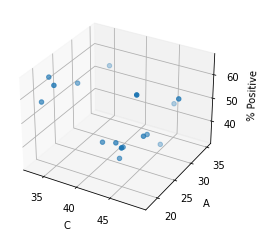

In [501]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C"]
x2 = df["A"]
y = df['por_pos']
ax.scatter(x1, x2, y, marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('A')
ax.set_zlabel('% Positive')

In [502]:
model = ols('por_neg ~ O + C + E + A + N', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                    0.7691
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.593
Time:                        19:10:40   Log-Likelihood:                -50.943
No. Observations:                  16   AIC:                             113.9
Df Residuals:                      10   BIC:                             118.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7677     19.555      1.215      0.252     -19.804      67.339
O             -0.1665      0.433     -0.385      0.709      -1.131       0.798
C              0.8362      0.528      1.583      0.145      -0.341       2.013
E             -0.3413      0.388     -0.880      0.400      -1.206       0.523
A             -0.2053      0.416     -0.494      0.632      -1.131       0.721
N             -0.0424      0.278     -0.153      0.881      -0.661       0.576
==============================================================================
Omnibus:                        1.061   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                0.480
Skew:                          -0.421   Prob(JB):                        0.787
Kurtosis:                       2.905   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Negative')

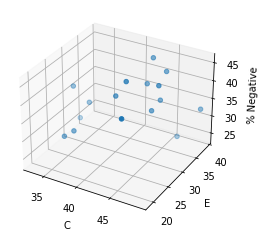

In [503]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C"]
x2 = df["E"]
y = df['por_neg']
ax.scatter(x1, x2, y, marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('E')
ax.set_zlabel('% Negative')

In [504]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     1.759
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.209
Time:                        19:10:40   Log-Likelihood:                -54.830
No. Observations:                  16   AIC:                             121.7
Df Residuals:                      10   BIC:                             126.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.4784     30.984      3.469      0.006      38.441     176.516
O_Coded        2.0102      3.780      0.532      0.606      -6.412      10.433
C_Coded      -13.8446      5.758     -2.404      0.037     -26.675      -1.014
E_Coded        2.6715      4.504      0.593      0.566      -7.364      12.707
A_Coded       -4.8207      4.245     -1.136      0.283     -14.278       4.637
N_Coded        1.7921      3.414      0.525      0.611      -5.815       9.399
==============================================================================
Omnibus:                        4.714   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.600
Skew:                           0.966   Prob(JB):                        0.273
Kurtosis:                       3.404   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     2.279
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.126
Time:                        19:10:40   Log-Likelihood:                -55.048
No. Observations:                  16   AIC:                             120.1
Df Residuals:                      11   BIC:                             124.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.8673     26.678      4.306      0.001      56.149     173.586
O_Coded        1.0054      3.151      0.319      0.756      -5.929       7.940
C_Coded      -13.0920      5.390     -2.429      0.033     -24.956      -1.228
E_Coded        1.8152      4.058      0.447      0.663      -7.116      10.746
A_Coded       -4.4932      4.058     -1.107      0.292     -13.424       4.438
==============================================================================
Omnibus:                        4.589   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.421
Skew:                           0.922   Prob(JB):                        0.298
Kurtosis:                       3.482   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [506]:
model = ols('por_pos ~ C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     3.249
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0600
Time:                        19:10:40   Log-Likelihood:                -55.121
No. Observations:                  16   AIC:                             118.2
Df Residuals:                      12   BIC:                             121.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.1780     25.643      4.492      0.001      59.306     171.050
C_Coded      -12.4832      4.849     -2.574      0.024     -23.048      -1.918
E_Coded        1.9226      3.890      0.494      0.630      -6.552      10.397
A_Coded       -4.4629      3.902     -1.144      0.275     -12.965       4.039
==============================================================================
Omnibus:                        4.647   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                2.409
Skew:                           0.911   Prob(JB):                        0.300
Kurtosis:                       3.542   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [507]:
model = ols('por_pos ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     5.044
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0239
Time:                        19:10:40   Log-Likelihood:                -55.282
No. Observations:                  16   AIC:                             116.6
Df Residuals:                      13   BIC:                             118.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.7376     22.365      5.398      0.000      72.421     169.054
C_Coded      -12.6057      4.700     -2.682      0.019     -22.759      -2.452
A_Coded       -3.8016      3.557     -1.069      0.305     -11.487       3.883
==============================================================================
Omnibus:                        6.506   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                3.595
Skew:                           1.062   Prob(JB):                        0.166
Kurtosis:                       3.937   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
model = ols('por_pos ~ C_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     8.856
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0100
Time:                        19:10:41   Log-Likelihood:                -55.956
No. Observations:                  16   AIC:                             115.9
Df Residuals:                      14   BIC:                             117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.5168     21.704      5.276      0.000      67.967     161.066
C_Coded      -13.7116      4.608     -2.976      0.010     -23.594      -3.829
==============================================================================
Omnibus:                        5.248   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                2.644
Skew:                           0.903   Prob(JB):                        0.267
Kurtosis:                       3.840   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Positive')

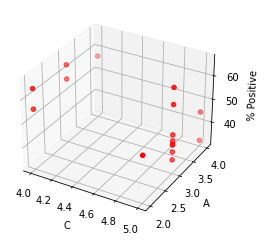

In [509]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C_Coded"]
x2 = df["A_Coded"]
y = df['por_pos']
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('A')
ax.set_zlabel('% Positive')

In [510]:
model = ols('por_neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     1.352
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.320
Time:                        19:10:41   Log-Likelihood:                -49.415
No. Observations:                  16   AIC:                             110.8
Df Residuals:                      10   BIC:                             115.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3211     22.088      0.377      0.714     -40.895      57.537
O_Coded       -0.0618      2.695     -0.023      0.982      -6.066       5.943
C_Coded        9.2662      4.105      2.257      0.048       0.120      18.413
E_Coded       -1.9712      3.211     -0.614      0.553      -9.126       5.183
A_Coded       -1.8667      3.026     -0.617      0.551      -8.609       4.875
N_Coded       -0.8573      2.434     -0.352      0.732      -6.280       4.565
==============================================================================
Omnibus:                        7.945   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                4.633
Skew:                          -1.116   Prob(JB):                       0.0986
Kurtosis:                       4.402   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
model = ols('por_neg ~ C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1.858
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.188
Time:                        19:10:41   Log-Likelihood:                -49.416
No. Observations:                  16   AIC:                             108.8
Df Residuals:                      11   BIC:                             112.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1903     20.348      0.403      0.695     -36.594      52.975
C_Coded        9.2266      3.549      2.600      0.025       1.415      17.038
E_Coded       -1.9626      3.041     -0.645      0.532      -8.655       4.730
A_Coded       -1.8733      2.872     -0.652      0.528      -8.195       4.449
N_Coded       -0.8290      2.001     -0.414      0.687      -5.233       3.575
==============================================================================
Omnibus:                        8.012   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.688
Skew:                          -1.120   Prob(JB):                       0.0959
Kurtosis:                       4.418   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
model = ols('por_neg ~ C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     2.600
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.100
Time:                        19:10:41   Log-Likelihood:                -49.539
No. Observations:                  16   AIC:                             107.1
Df Residuals:                      12   BIC:                             110.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9160     18.091      0.272      0.790     -34.501      44.333
C_Coded        9.1599      3.421      2.678      0.020       1.706      16.613
E_Coded       -1.5168      2.744     -0.553      0.591      -7.496       4.462
A_Coded       -2.0107      2.753     -0.730      0.479      -8.009       3.987
==============================================================================
Omnibus:                        8.619   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                5.213
Skew:                          -1.194   Prob(JB):                       0.0738
Kurtosis:                       4.456   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [513]:
model = ols('por_neg ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3.959
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0454
Time:                        19:10:41   Log-Likelihood:                -49.741
No. Observations:                  16   AIC:                             105.5
Df Residuals:                      13   BIC:                             107.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5297     15.818      0.033      0.974     -33.643      34.702
C_Coded        9.2565      3.324      2.785      0.015       2.076      16.437
A_Coded       -2.5324      2.516     -1.007      0.333      -7.968       2.903
==============================================================================
Omnibus:                       10.977   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.431
Skew:                          -1.389   Prob(JB):                       0.0243
Kurtosis:                       4.853   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [514]:
model = ols('por_neg ~ C_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     6.898
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0199
Time:                        19:10:41   Log-Likelihood:                -50.341
No. Observations:                  16   AIC:                             104.7
Df Residuals:                      14   BIC:                             106.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6143     15.280     -0.237      0.816     -36.386      29.158
C_Coded        8.5198      3.244      2.626      0.020       1.562      15.477
==============================================================================
Omnibus:                        6.912   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                3.860
Skew:                          -1.078   Prob(JB):                        0.145
Kurtosis:                       4.067   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, '% Negative')

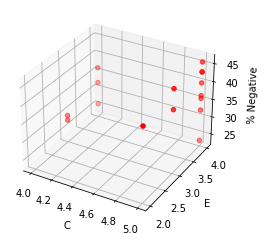

In [515]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = df["C_Coded"]
x2 = df["E_Coded"]
y = df['por_neg']
ax.scatter(x1, x2, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('C')
ax.set_ylabel('E')
ax.set_zlabel('% Negative')

In [516]:
feature_cols = ['O', 'C', 'E', 'A', 'N']
x = df[feature_cols]
y = df['por_pos']

# follow the usual sklearn pattern: import, instantiate, fit

lm = LinearRegression()
lm.fit(x, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

lm.score(x, y)

89.49820374976133
[ 0.15342691 -1.03596749  0.40884375 -0.46837761 -0.09684181]


0.27600668436627973

The skew of this distribution is =  0.0052046066431086285


/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


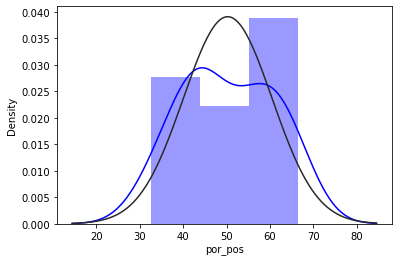

In [517]:
from scipy.stats import norm, skew

sns.distplot(df['por_pos'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['por_pos']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.024635100585398022


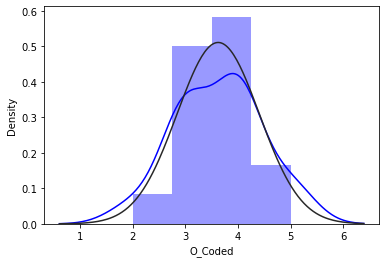

In [518]:
from scipy.stats import norm, skew

sns.distplot(df['O_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['O_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.8090398349558905


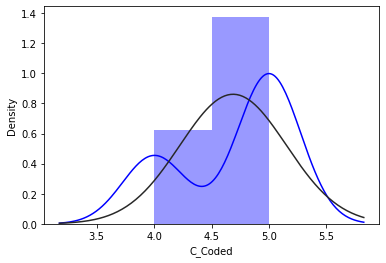

In [519]:
from scipy.stats import norm, skew

sns.distplot(df['C_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['C_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -1.359876613415705


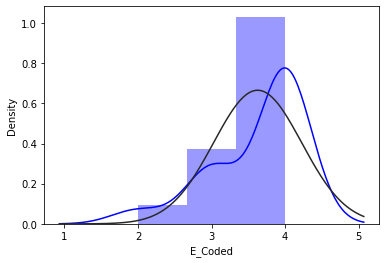

In [520]:
from scipy.stats import norm, skew

sns.distplot(df['E_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['E_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  0.0


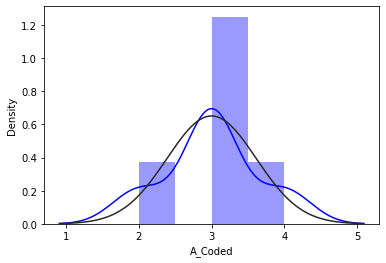

In [521]:
from scipy.stats import norm, skew

sns.distplot(df['A_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['A_Coded']))

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  -0.35380019214382935


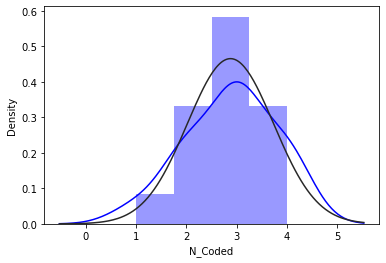

In [522]:
from scipy.stats import norm, skew

sns.distplot(df['N_Coded'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(df['N_Coded']))

In [523]:
print('The skew of this distribution is = ', skew(df['O_Coded']))
print('The skew of this distribution is = ', skew(df['C_Coded']))
print('The skew of this distribution is = ', skew(df['E_Coded']))
print('The skew of this distribution is = ', skew(df['A_Coded']))
print('The skew of this distribution is = ', skew(df['N_Coded']))

The skew of this distribution is =  -0.024635100585398022
The skew of this distribution is =  -0.8090398349558905
The skew of this distribution is =  -1.359876613415705
The skew of this distribution is =  0.0
The skew of this distribution is =  -0.35380019214382935


In [524]:
# df['O_Coded'], lmbda = boxcox(df['O_Coded'])
# df['C_Coded'], lmbda = boxcox(df['C_Coded'])
# df['E_Coded'], lmbda = boxcox(df['E_Coded'])
# df['A_Coded'], lmbda = boxcox(df['A_Coded'])
# df['N_Coded'], lmbda = boxcox(df['N_Coded'])

In [525]:
print('The skew of this distribution is = ', skew(df['O_Coded']))
print('The skew of this distribution is = ', skew(df['C_Coded']))
print('The skew of this distribution is = ', skew(df['E_Coded']))
print('The skew of this distribution is = ', skew(df['A_Coded']))
print('The skew of this distribution is = ', skew(df['N_Coded']))

The skew of this distribution is =  -0.024635100585398022
The skew of this distribution is =  -0.8090398349558905
The skew of this distribution is =  -1.359876613415705
The skew of this distribution is =  0.0
The skew of this distribution is =  -0.35380019214382935


In [526]:
df

,Participant,pos,neu,neg,por_pos,por_neu,por_neg,O,C,E,A,N,O_Coded,C_Coded,E_Coded,A_Coded,N_Coded
0,P1,1991,736,2311,39.519651,14.608972,45.871378,37,43,36,24,26,4,5,4,3,3
1,P2,2009,717,1822,44.173263,15.765172,40.061566,41,43,34,22,23,5,5,4,3,3
2,P3,2774,598,2560,46.763318,10.080917,43.155765,43,46,31,24,15,5,5,4,3,2
3,P4,2016,338,817,63.576159,10.659098,25.764743,17,33,33,22,39,2,4,4,3,4
4,P5,3342,467,2184,55.765059,7.792424,36.442516,22,33,31,20,8,3,4,4,2,1
5,P6,5575,770,3040,59.403303,8.204582,32.392115,39,49,39,28,15,4,5,4,3,2
6,P7,890,159,496,57.605178,10.291262,32.103560,35,35,32,26,16,4,4,4,3,2
7,P8,1170,478,947,45.086705,18.420039,36.493256,29,45,34,35,29,3,5,4,4,3
8,P9,4284,650,1522,66.356877,10.068154,23.574969,40,46,38,22,21,4,5,4,3,3
9,P10,2369,313,2026,50.318607,6.648258,43.033135,32,46,19,18,28,4,5,2,2,3


In [527]:
print('The skew of this distribution is = ', skew(df['O_Coded']))
print('The skew of this distribution is = ', skew(df['C_Coded']))
print('The skew of this distribution is = ', skew(df['E_Coded']))
print('The skew of this distribution is = ', skew(df['A_Coded']))
print('The skew of this distribution is = ', skew(df['N_Coded']))

The skew of this distribution is =  -0.024635100585398022
The skew of this distribution is =  -0.8090398349558905
The skew of this distribution is =  -1.359876613415705
The skew of this distribution is =  0.0
The skew of this distribution is =  -0.35380019214382935


In [528]:
pg.normality(df)

,W,pval,normal
pos,0.753768,0.000706,False
neu,0.501669,0.000002,False
neg,0.563833,0.000008,False
por_pos,0.951069,0.506813,True
por_neu,0.845975,0.011894,False
por_neg,0.944352,0.405776,True
O,0.949463,0.481232,True
C,0.868218,0.025544,False
E,0.959798,0.658125,True
A,0.921497,0.178298,True


In [529]:
model = ols('por_pos ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     5.044
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0239
Time:                        19:10:43   Log-Likelihood:                -55.282
No. Observations:                  16   AIC:                             116.6
Df Residuals:                      13   BIC:                             118.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.7376     22.365      5.398      0.000      72.421     169.054
C_Coded      -12.6057      4.700     -2.682      0.019     -22.759      -2.452
A_Coded       -3.8016      3.557     -1.069      0.305     -11.487       3.883
==============================================================================
Omnibus:                        6.506   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                3.595
Skew:                           1.062   Prob(JB):                        0.166
Kurtosis:                       3.937   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [530]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

# Durbin-Watson test: This is done by comparing the successive error terms to check if they are 
# directly/inversely correlated with each other. Values between 1.5–2.5 would tell us that 
# autocorrelation is not a problem in that predictive model.

# 0–1.5 in the Durbin-Watson test refers to a significant positive correlation while 
# 2.5+ refers to a significantly negative correlation.

1.922453574550527

In [531]:
feature_cols = ['O', 'C', 'E', 'A', 'N']
X = df[feature_cols]
y = df['por_pos']

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

results.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.7625
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.597
Time:                        19:10:43   Log-Likelihood:                -57.293
No. Observations:                  16   AIC:                             126.6
Df Residuals:                      10   BIC:                             131.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.4982     29.083      3.077      0.012      24.698     154.299
O              0.1534      0.644      0.238      0.816      -1.281       1.588
C             -1.0360      0.786     -1.318      0.217      -2.787       0.715
E              0.4088      0.577      0.709      0.495      -0.876       1.694
A             -0.4684      0.618     -0.758      0.466      -1.846       0.909
N             -0.0968      0.413     -0.235      0.819      -1.016       0.823
==============================================================================
Omnibus:                        2.433   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.104
Skew:                           0.174   Prob(JB):                        0.576
Kurtosis:                       1.761   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [532]:
feature_cols = ['C', 'E']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  87.66349265118589
COEF:  [-1.45788041  0.67646665]
Score:  0.39828912974045716
Mean Absolute Error: 10.348892142042779
Mean Squared Error: 175.33481246774738
Root Mean Squared Error: 13.241405230101048
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     2.979
Date:                Fri, 25 Jun 2021   Prob (F-statistic):              0.102
Time:                        19:10:43   Log-Likelihood:                -42.053
No. Observations:                  12   AIC:                             90.11
Df Residuals:                       9   BIC:                             91.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                     

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [533]:
feature_cols = ['C', 'A']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  13.60114511010104
COEF:  [ 0.92138846 -0.56957003]
Score:  0.4480157046452491
Mean Absolute Error: 6.067626422491785
Mean Squared Error: 101.00179267408879
Root Mean Squared Error: 10.049964809594549
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     3.652
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0690
Time:                        19:10:43   Log-Likelihood:                -35.995
No. Observations:                  12   AIC:                             77.99
Df Residuals:                       9   BIC:                             79.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                       

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [534]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  130.54060505379275
COEF:  [-15.79540642  -2.60812205]
Score:  0.6259472815369671
Mean Absolute Error: 7.238109914856617
Mean Squared Error: 132.81029780425678
Root Mean Squared Error: 11.524335026553887
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     7.530
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0120
Time:                        19:10:43   Log-Likelihood:                -39.201
No. Observations:                  12   AIC:                             84.40
Df Residuals:                       9   BIC:                             85.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                    

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [535]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  -8.441881790922935
COEF:  [11.79034476 -3.15065464]
Score:  0.6245588979487107
Mean Absolute Error: 5.622661453981376
Mean Squared Error: 79.01733857095978
Root Mean Squared Error: 8.889169734624252
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7.486
Date:                Fri, 25 Jun 2021   Prob (F-statistic):             0.0122
Time:                        19:10:43   Log-Likelihood:                -33.682
No. Observations:                  12   AIC:                             73.36
Df Residuals:                       9   BIC:                             74.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                        

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [1]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_neg']

results = []

for n in range(1, 11):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    kf = KFold(n_splits=5, shuffle=True)

    lm = LinearRegression()
    # scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    scores = cross_val_score(lm, X_train, y_train, scoring="r2", cv=kf)
    print(scores)
    # print(sorted(me.SCORERS.keys()))
    # print(np.absolute(np.mean(scores)))
    predictions = cross_val_predict(lm, X_train, y_train, cv=kf)
#     print(predictions)
    accuracy = me.r2_score(y_train, predictions)
#     print("Cross-Predicted Accuracy: ", accuracy)
    results.append(accuracy)
    
print(np.mean(results))

NameError: name 'df' is not defined

In [537]:
predictions = cross_val_predict(lm, X_train, y_train, cv=5)
predictions

array([28.74235249, 41.90012782, 25.0893397 , 39.22992988, 37.28627117,
       39.22992988, 36.25793704, 39.54489975, 38.7149266 , 31.53626088,
       38.31849579, 39.93900278])

In [538]:
accuracy = me.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

Cross-Predicted Accuracy:  -0.013271914212269253


In [539]:
X.loc[3]

C_Coded    4
A_Coded    3
Name: 3, dtype: int64

In [2]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

kf = KFold(n_splits=5, random_state=1, shuffle=True)

scores = []

for train_index, test_index in kf.split(X):
#         print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)

#         print("Intercept : ", regressor.intercept_)
#         print("COEF: ", regressor.coef_)
#         print("Score: ", regressor.score(X_train, y_train))
#         print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
#         print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
#         print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))
        scores.append(regressor.score(X_train, y_train))
    
print(np.mean(scores))

NameError: name 'df' is not defined

In [541]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

# evaluate a model with a given number of repeats
def evaluate_model(X_train, y_train, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    model = LinearRegression()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    print(scores)
    return scores

# configurations to test
repeats = range(1,6)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scores = evaluate_model(X_train, y_train, r)
    # summarize
#     print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), stats.sem(scores)))
    # store
    results.append(np.mean(scores))
    
print(np.mean(results))

[  0.89434164 -10.56576522 -41.09423463  -5.00892887   0.61239303]
[ 8.94341640e-01 -1.05657652e+01 -4.10942346e+01 -5.00892887e+00
  6.12393034e-01  1.98224747e-02 -4.63418611e-01 -9.26941951e+00
  7.73581942e-01  8.96397263e-01]
[ 8.94341640e-01 -1.05657652e+01 -4.10942346e+01 -5.00892887e+00
  6.12393034e-01  1.98224747e-02 -4.63418611e-01 -9.26941951e+00
  7.73581942e-01  8.96397263e-01 -5.86442417e+00  2.10690866e-01
 -2.14735045e+00 -6.67784596e+00  7.73581942e-01]
[ 8.94341640e-01 -1.05657652e+01 -4.10942346e+01 -5.00892887e+00
  6.12393034e-01  1.98224747e-02 -4.63418611e-01 -9.26941951e+00
  7.73581942e-01  8.96397263e-01 -5.86442417e+00  2.10690866e-01
 -2.14735045e+00 -6.67784596e+00  7.73581942e-01  4.91164056e-01
  4.49133932e-01 -1.77241076e+00 -2.28448056e-01 -9.55723632e-02]
[ 8.94341640e-01 -1.05657652e+01 -4.10942346e+01 -5.00892887e+00
  6.12393034e-01  1.98224747e-02 -4.63418611e-01 -9.26941951e+00
  7.73581942e-01  8.96397263e-01 -5.86442417e+00  2.10690866e-01
 -2